In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [94]:
sample_size = 100000

In [125]:
def prepare_data(samples, threshold):
    new_samples = np.round(samples, 0).astype(int)
    new_samples = new_samples[(new_samples >= 0) & (new_samples < threshold)]
    new_samples = np.sort(new_samples)
    unique_elements, counts_elements = np.unique(new_samples, return_counts=True)
    counts_elements = counts_elements / np.sum(counts_elements)
    return unique_elements, counts_elements

def barplot(samples1, name1, samples2=None, name2=None, figsize=(10,5), threshold=100, xticks_angle=0):
    plt.figure(figsize=figsize)
    plt.grid()
    unique_elements1, counts_elements1 = prepare_data(samples1, threshold)
    df = pd.DataFrame({'values': unique_elements1, 'frequency': counts_elements1, 'dist': name1})
    if samples2 is not None:
        unique_elements2, counts_elements2 = prepare_data(samples2, threshold)
        df2 = pd.DataFrame({'values': unique_elements2, 'frequency': counts_elements2, 'dist': name2})
        df = pd.concat((df, df2), ignore_index=True)
    g = sns.barplot(x='values', y='frequency', hue='dist', data=df)
    g.set_xticklabels(rotation=xticks_angle, labels=df['values'].unique())
    return g

# Binomial can be approximated by Poisson

### ... when:
- **n_trials** is large AND
- **p_success_in_one_trial** is small AND 
- **n_trials * p_success_in_one_trial** is moderate.

### Poisson is Binomial in the limit:
- **λ** = n_trials * p_success_in_one_trial
- **n_trials** -> inf
- **p_success_in_one_trial** -> 0

### --- Good approximation ---

In [126]:
n_trials = 100
p_success_in_one_trial = 0.03

binomial_samples = np.random.binomial(n_trials, p_success_in_one_trial, sample_size)

In [127]:
lam = n_trials * p_success_in_one_trial

poisson_samples = np.random.poisson(lam=lam, size=sample_size)

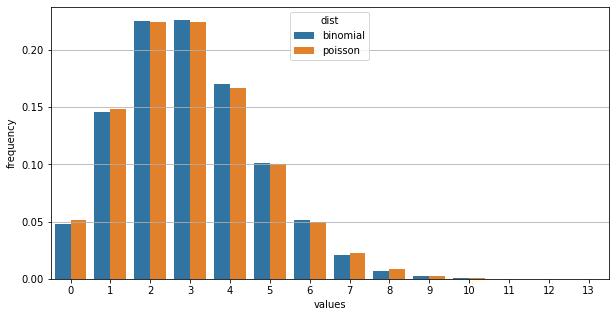

In [128]:
barplot(binomial_samples, 'binomial', poisson_samples, 'poisson', threshold=15);

### --- Bad approximation ---

In [129]:
n_trials = 100
p_success_in_one_trial = 0.96

binomial_samples = np.random.binomial(n_trials, p_success_in_one_trial, sample_size)

In [130]:
lam = n_trials * p_success_in_one_trial

poisson_samples = np.random.poisson(lam=lam, size=sample_size)

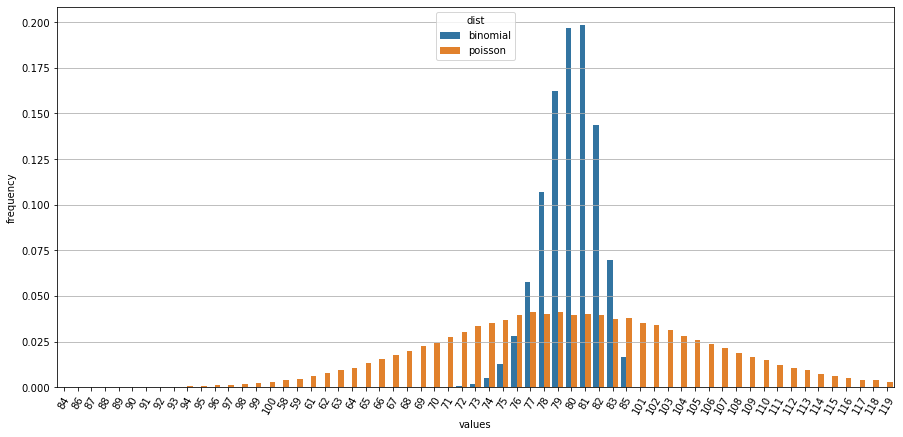

In [131]:
barplot(binomial_samples, 'binomial', poisson_samples, 'poisson', figsize=(15, 7), threshold=120, xticks_angle=60);

# Binomial can be approximated by Normal

### ... when:
- **n_trials** is large AND
- **p_success_in_one_trial** is moderate

### Normal approximation:
- **μ** = n_trials * p_success_in_one_trial
- **σ** -> sqrt(n_trials * p_success_in_one_trial * (1-p_success_in_one_trial))

### --- Good approximation ---

In [132]:
n_trials = 100
p_success_in_one_trial = 0.6

binomial_samples = np.random.binomial(n_trials, p_success_in_one_trial, sample_size)

In [133]:
mu = n_trials * p_success_in_one_trial
std = np.sqrt(n_trials * p_success_in_one_trial * (1-p_success_in_one_trial))

normal_samples = np.random.normal(mu, std, sample_size)

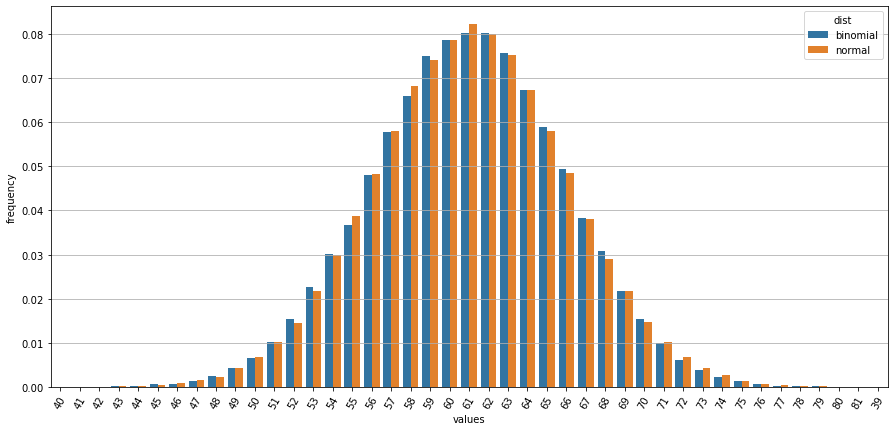

In [134]:
barplot(binomial_samples, 'binomial', normal_samples, 'normal', figsize=(15, 7), threshold=120, xticks_angle=60);

### --- Bad approximation ---

In [135]:
n_trials = 100
p_success_in_one_trial = 0.05

binomial_samples = np.random.binomial(n_trials, p_success_in_one_trial, sample_size)

In [136]:
mu = n_trials * p_success_in_one_trial
std = np.sqrt(n_trials * p_success_in_one_trial * (1-p_success_in_one_trial))

normal_samples = np.random.normal(mu, std, sample_size)

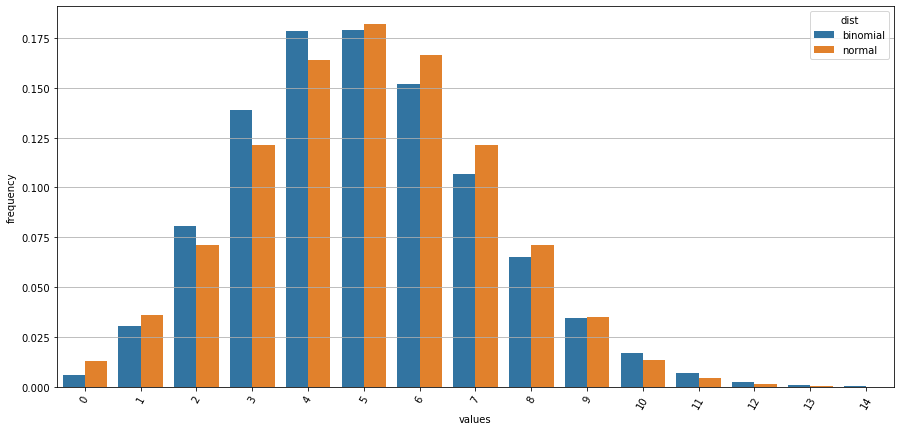

In [138]:
barplot(binomial_samples, 'binomial', normal_samples, 'normal', figsize=(15, 7), threshold=15, xticks_angle=60);